# Importing Libraries

In [1]:
!pip install nltk
!pip install wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.2/763.2 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.6/363.6 KB 26.7 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 23.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 139.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 144.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 24.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 150.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 160.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 KB 61

In [3]:
import tensorflow as tf
print(tf.__version__)

2022-04-24 02:27:34.178591: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 02:27:34.178633: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# EDA

In [5]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [8]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

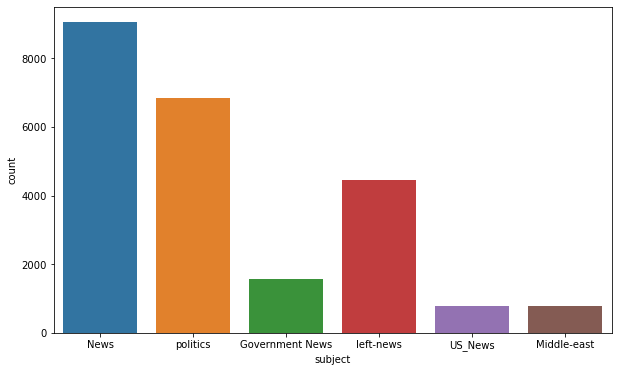

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake)

 ### Wordcloud: Fake News

In [11]:
text = ' '.join(fake['text'].tolist())

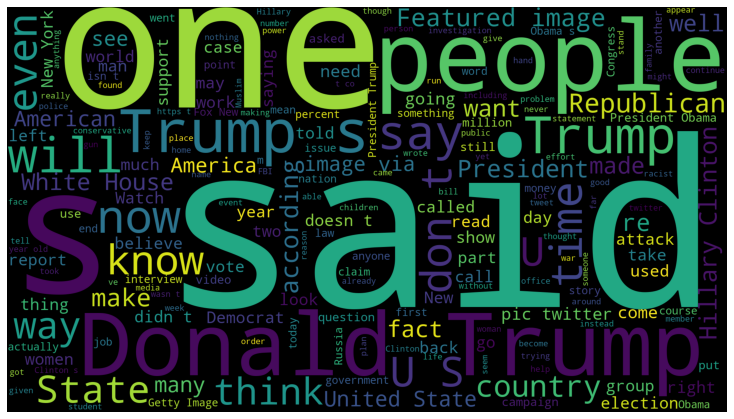

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Wordcloud: Real News

In [13]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [14]:
real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
text = ' '.join(real['text'].tolist())

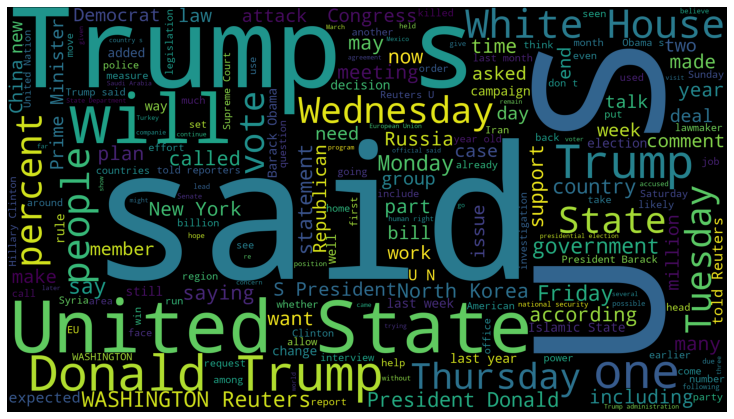

In [16]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations:
Real news seems to have source of publication which is not present in fake news set.

Most text contains reuters info such as "WASHINGTON (Reuters)".

Some text are tweets from Twitter

Few text do not contain any publication info

# Cleaning Data

### Cleaning Real News Dataset

Goal: Removing Reuters or Twitter Tweet info from the text

Text can be split only once at " - " which is always present after mentioning source of publication, this gives us the publication part and the text part

If we do not get text part, this means publication details wasn't given for that record

The Twitter tweets always have same source, a long text of max 259 characters

In [17]:
real.sample(5)

,title,text,subject,date
4517,U.S. top court to weigh Jordan-based bank's li...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"April 3, 2017"
8368,White House proposes rule to welcome immigrant...,WASHINGTON (Reuters) - The Obama administratio...,politicsNews,"August 26, 2016"
10010,Obama to discuss Islamic State at CIA next week,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,politicsNews,"April 8, 2016"
14362,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,"November 20, 2017"
2183,Trump blasts CEOs who quit advisory panels as ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 15, 2017"


In [18]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [19]:
len(unknown_publishers)

222

In [20]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [21]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [22]:
real['publisher']=publisher
real['text'] = tmp_text

In [23]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [24]:
real.shape

(21417, 5)

### Cleaning both Real & Fake News Dataset

Goal: Remove rows with no text

Since rows with no text appears to have the text in the title column, we merge the title and text columns together

In [25]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [26]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [27]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

Converting to lowercase

In [28]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing Text

In [29]:
real['class'] = 1
fake['class'] = 0

In [30]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [31]:
real = real[['text', 'class']]

In [32]:
fake = fake[['text', 'class']]

In [33]:
data = real.append(fake, ignore_index=True)

/tmp/ipykernel_31/1474393329.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [34]:
data.sample(5)

,text,class
30848,leftist media exposes democrat party for ignor...,0
29887,donations to trump’s ‘veteran fundraiser’ not...,0
39241,breaking news: n. american family held hostage...,0
27872,hillary’s latest challenge to progressives is...,0
24873,"watch: trump defends russia, so john mccain h...",0


### Remove special characters

In [35]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
import preprocess_kgptalkie as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 23.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.6/457.6 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 KB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 118.7 MB/s eta 0:00:00
2022-04-24 02:29:02.841873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-24 02:29:0

In [36]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [37]:
ps.remove_special_chars('this ,. @ # is gre@t')

'this is gret'

In [38]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


# Machine Learning: Word2Vec

In [39]:
!pip install gensim==3.5.0
import gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 23.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.5.0-cp39-cp39-linux_x86_64.whl size=23394823 sha256=38641b9efe00e068b61d079fb2369e2ba9617678b7d4e2b6271ef802c7ff21b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-uq6_d1mp/wheels/31/ce/cf/effa550d26af6d973571a7cbf8ea351ca961de8ba4fb518c54
Successfully built gensim


In [40]:
y = data['class'].values

In [41]:
X = [d.split() for d in data['text'].tolist()]

In [42]:
type(X[0])

list

In [43]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [44]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [45]:
len(w2v_model.wv.vocab)

231911

In [46]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.737360417842865),
 ('trumpthe', 0.5688730478286743),
 ('he', 0.5453871488571167),
 ('him', 0.5449103116989136),
 ('trumptrump', 0.5221466422080994),
 ('trumpfeatured', 0.5104054808616638),
 ('presidentelect', 0.502583384513855),
 ('decisiontrump', 0.4972957968711853),
 ('obama', 0.49516749382019043),
 ('trumphere', 0.49161213636398315)]

In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [48]:
X = tokenizer.texts_to_sequences(X)

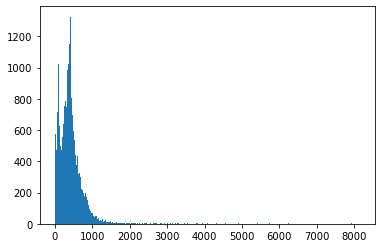

In [49]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

Check no. of rows with more than 1000 words

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

Change all rows to only have maximum of 1000 words

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[10])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

### Create Our ML Model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

### Create Train & Test Datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

In [ ]:
X_test

In [ ]:
x = ["Israeli Defense Minister: If Pakistan sends ground troops into Syria on any pretext, we will destroy this country with a nuclear attack"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

In [ ]:
x = ["1 dead, 37 taken to hospital after 2 buses collided near Joo Koon MRT"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

# 4 Classification Methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import string

In [ ]:
# fake dataset for classification
fake_class = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
# real dataset for classification
real_class = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
fake_class.head(10)

In [ ]:
real_class.head(10)

In [ ]:
fake_class.shape, real_class.shape

In [ ]:
real_class["class"] = 1;
fake_class["class"] = 0;

In [ ]:
fake_manual_testing = fake_class.tail(10)
# take last 10 rows of data for manual testing and remove it from the dataset
for i in range(23480, 23470, -1):
    fake_class.drop([i], axis=0, inplace=True)
  
real_manual_testing = real_class.tail(10)
for i in range(21416, 21406, -1):
    real_class.drop([i], axis=0, inplace=True)

In [ ]:
manual_testing = pd.concat([fake_manual_testing, real_manual_testing], axis=0)
# save the 20 rows in a csv file
manual_testing.to_csv("manual_testing.csv")

In [ ]:
# combine fake and real data into one dataset
marge = pd.concat([fake_class, real_class], axis=0)
marge.head()

In [ ]:
# remove unuse data
data_class = marge.drop(["title", "subject", "date"], axis=1)
data_class.head(10)

In [ ]:
# shuffle the data
data_class = data_class.sample(frac=1)
data_class.head(10)

In [ ]:
# check empty data
data_class.isnull().sum()

In [ ]:
# write a function to remove all the symbols in text
def word_drop(text):
    # change all text to lower case
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+',  '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text;

In [ ]:
# apply the function
data_class["text"] = data_class["text"].apply(word_drop)
data_class.head(10)


In [ ]:
# assign text to x, class to y for classification later
x_class = data_class["text"]
y_class= data_class["class"]

In [ ]:
# create train and text datasets
x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, test_size = .25)

In [ ]:
# TfidfVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
# fit_transform: Learn vocabulary and idf, return document-term matrix.
xv_train = vectorization.fit_transform(x_train)
# transform: Transform documents to document-term matrix.
xv_test = vectorization.transform(x_test)

#### *data preparation done. start classification*
### Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

In [ ]:
# check the accuracy of the dataset
LR.score(xv_test, y_test)

In [ ]:
# classification report for Logistic Regression
pred_LR = LR.predict(xv_test)
print(classification_report(y_test, pred_LR))

### Decision Tree classification:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

In [ ]:
DT.score(xv_test, y_test)

In [ ]:
# classification report for Decision Tree
pred_DT = DT.predict(xv_test)
print(classification_report(y_test, pred_DT))

### Gradient Boosting Classifier:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

In [ ]:
GBC.score(xv_test, y_test)

In [ ]:
pred_GBC = GBC.predict(xv_test)
print(classification_report(y_test, pred_GBC))

### Random Forest classification:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

In [ ]:
RFC.score(xv_test, y_test)

In [ ]:
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test, pred_RFC))

# Compare the 4  classification models:
## *Logistic Regression* <br>
**Score:** 0.9868983957219252 <br>

              precision    recall  f1-score   support
           0       0.99      0.99      0.99      5935
           1       0.98      0.99      0.99      5285
    accuracy                           0.99      11220
    macro avg      0.99      0.99      0.99      11220
    weighted avg   0.99      0.99      0.99      11220
   
## *Decision Tree classification* <br>
**Score:** 0.9952762923351158 <br>

              precision    recall  f1-score   support
           0       1.00      0.99      1.00      5935
           1       0.99      1.00      0.99      5285
    accuracy                           1.00     11220
    macro avg      1.00      1.00      1.00     11220
    weighted avg   1.00      1.00      1.00     11220
   
## *Gradient Boosting Classifier* <br>
**Score:** 0.9941176470588236 <br>

              precision    recall  f1-score   support
           0       1.00      0.99      0.99      5935
           1       0.99      1.00      0.99      5285
    accuracy                           0.99     11220
    macro avg      0.99      0.99      0.99     11220
    weighted avg   0.99      0.99      0.99     11220
   
## *Random Forest classification* <br>
**Score:** 0.9869875222816399 <br>

              precision    recall  f1-score   support
           0       1.00      0.99      0.99      5935
           1       0.99      1.00      0.99      5285
    accuracy                           0.99     11220
    macro avg      0.99      0.99      0.99     11220
    weighted avg   0.99      0.99      0.99     11220
   

## Conclusion:
Decision Tree classification and Gradient Bossting Classifier have higher accuracy ~99%. Hence we should use these 2 models

In [ ]:
def output_lable(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"

def manual_testing(news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(word_drop)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_DT = LR.predict(new_xv_test)
  pred_GBC = GBC.predict(new_xv_test)
  return print("\n\nDT Prediction: {} \nGBC Prediction: {}".format(output_lable(pred_DT[0]), output_lable(pred_GBC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
new_data = pd.read_csv('https://raw.githubusercontent.com/NiyathaS/SC1015/main/fake_or_real_news.csv')

In [ ]:
new_data.head(10)

In [ ]:
empty_index = [index for index,text in enumerate(new_data.text.tolist()) if str(text).strip()==""]

In [ ]:
new_data.iloc[empty_index]

In [ ]:
new_data['text'] = new_data['title'] + " " + new_data['text']

In [ ]:
cleaned_data = new_data[['text', 'class']]

In [ ]:
cleaned_data.sample(5)

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
new_pred = (model.predict(new_data) >= 0.5).astype(int)